<a href="https://colab.research.google.com/github/aanchalkhanna72/AML/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CUSTOMER SEGMENTATION PROJECT**

*Guided Project with Prof. Nirmal Gaud*


**What is this project about?**
- Segmenting customers on the basis of customer behaviour and demographics 
- Experimenting with unsupervised learning methods


**Why is this business problem important?**

In the current age where customers are flooded with abundance of choice in terms of products and services, it is incredibly valuable for a  business to create a nuanced, exhaustive understanding of its customer base. Doing so allows them to create better products, identify and attract new customers with similar tastes, retain existing customers,etc. 

For instance, Netflix understands its users by collecting streaming data, which further is used to group users based on behaviours or preferences. Once identified, users of a particular segment are given recommendations based on their  similarity of preferences. 

Therefore, solving this problem holds the possibility for increasing revenue and giving market edge to a business.



**Data Appreciation:**

The fictitious dataset (Kaggle) below belongs to an organization that is interested in segmenting its customer base based on the data collected by them. They have information for demographic attributes like marital status, income level, education level, year of birth as well as information about behavioural attributes like recency of purchase, total amount spent on purchases, response to promotions, etc. The data seems extensive in terms of availability of features, although it is not very big in  terms of size.

**Process:**

**A. Data Cleaning**

In [38]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings 
warnings.filterwarnings("ignore")

In [39]:
#reading file
cust=pd.read_csv("https://raw.githubusercontent.com/aanchalkhanna72/Datasets/main/customer_data.csv")

In [40]:
#top  5 rows of customer data
cust.head()


ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single   58138        0         0   
1  2174        1954  Graduation         Single   46344        1         1   
2  4141        1965  Graduation       Together   71613        0         0   
3  6182        1984  Graduation       Together   26646        1         0   
4  5324        1981         PhD        Married   58293        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [41]:
#length of data
cust.shape


(200, 29)

In [42]:
#checking non-null values
cust.info()
#There are no non-null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   200 non-null    int64 
 1   Year_Birth           200 non-null    int64 
 2   Education            200 non-null    object
 3   Marital_Status       200 non-null    object
 4   Income               200 non-null    int64 
 5   Kidhome              200 non-null    int64 
 6   Teenhome             200 non-null    int64 
 7   Dt_Customer          200 non-null    object
 8   Recency              200 non-null    int64 
 9   MntWines             200 non-null    int64 
 10  MntFruits            200 non-null    int64 
 11  MntMeatProducts      200 non-null    int64 
 12  MntFishProducts      200 non-null    int64 
 13  MntSweetProducts     200 non-null    int64 
 14  MntGoldProds         200 non-null    int64 
 15  NumDealsPurchases    200 non-null    int64 
 16  NumWebPu

In [43]:
#checking if columns have duplicate data
cust.duplicated().sum()

0

**B. Exploratory Data Analysis**

In [44]:
%pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
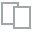
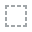
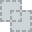
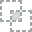
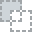
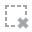
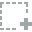
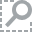
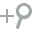
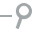
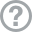
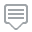
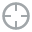
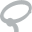
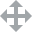
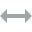
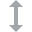
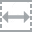
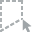
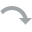
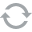
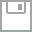
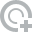
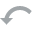
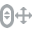
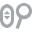
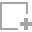
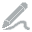
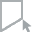
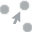
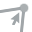
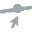

In [45]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
create_report(cust)

In [46]:
#changing dtype of date from string to datetime format (with timestamp)
cust["Dt_Customer"]=pd.to_datetime(cust["Dt_Customer"])
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",cust["Dt_Customer"].max())
print("The oldest customer's enrolment date in the records:",cust["Dt_Customer"].min())

The newest customer's enrolment date in the records: 2014-12-05 00:00:00
The oldest customer's enrolment date in the records: 2012-02-11 00:00:00


In [47]:
#Value counts in categorical variables
print("Number of customers in Category 'Marital Status':", cust["Marital_Status"].value_counts(),"\n")

Number of customers in Category 'Marital Status': Married     83
Together    48
Single      40
Divorced    23
Widow        4
Alone        2
Name: Marital_Status, dtype: int64 



Most people have a partner, either by way of marriage or living together. The remaining people are single, divorced or alone.

In [48]:
#Value counts in categorical variables
print("Number of customers in Category 'Education':", cust["Education"].value_counts(),"\n")

Number of customers in Category 'Education': Graduation    111
PhD            49
Master         35
Basic           5
Name: Education, dtype: int64 



Most people have completed their higher studies in the form of bachelor's, PhD or Master's. Only 5 people have basic education below Class 12 level.

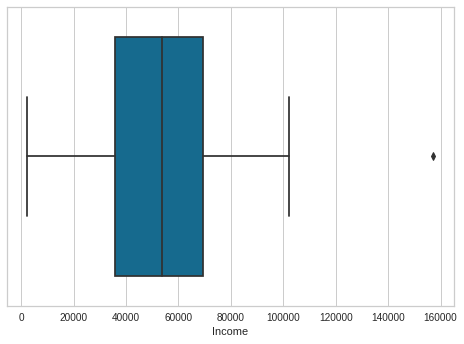

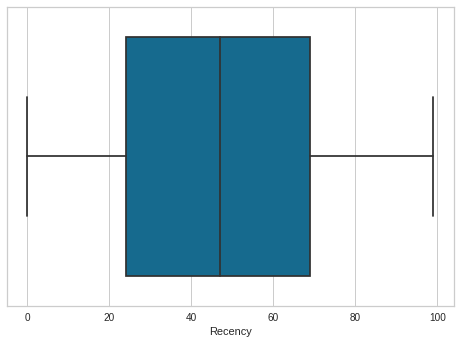

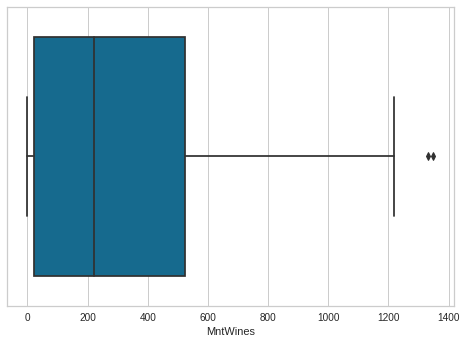

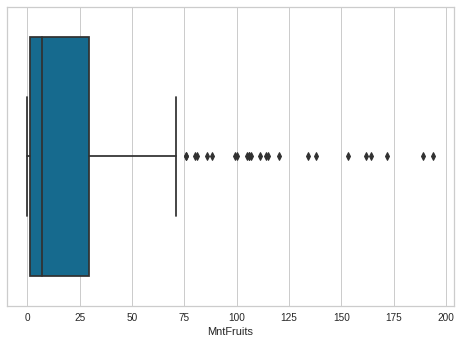

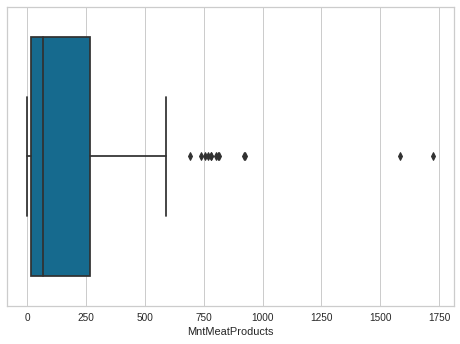

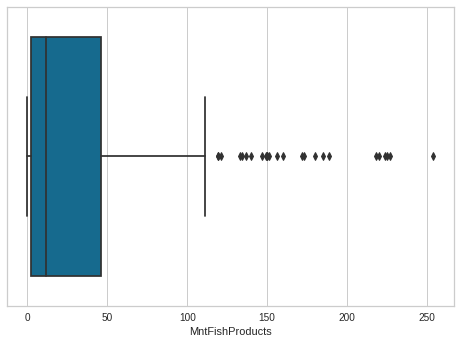

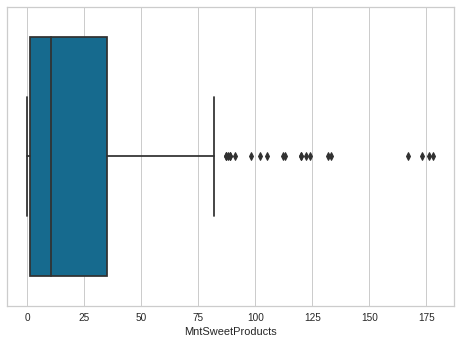

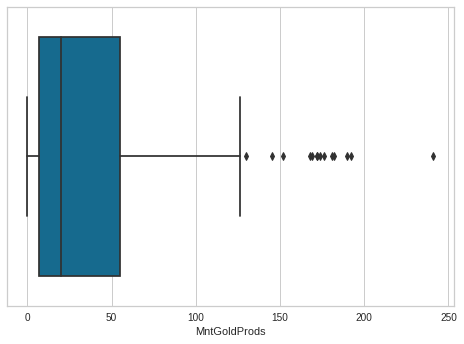

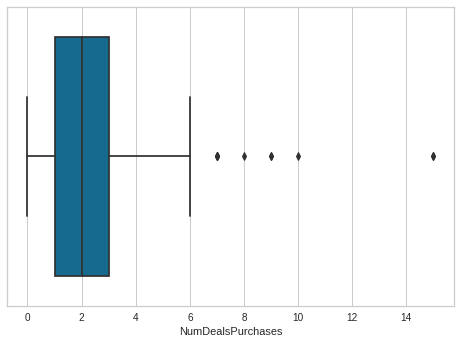

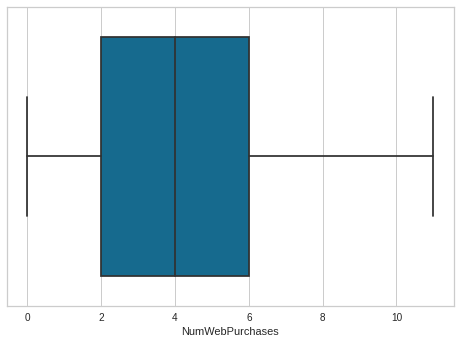

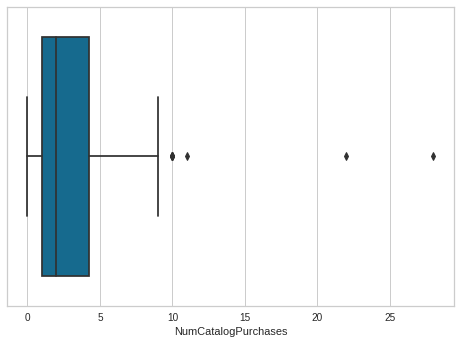

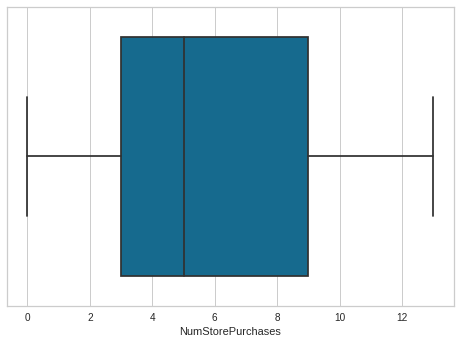

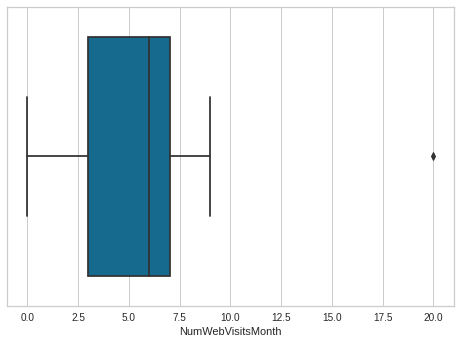

In [49]:
#Looking at outliers in continuous numerical columns
X=cust[['Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
for i in X:
  boxplot=sns.boxplot(cust[i])
  plt.show()

**Outlier Observations:**

Outliers exist in 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'. However, since the dataset is small, we want to prevent data loss that can occur by removing observations. We will therefore cap a few, but not all, variables during engineering.


**C.Feature Engineering**

In [50]:
#transforming datetime datatype to simple dates (Without timestamp)
dates=[]
for i in cust["Dt_Customer"]:
  i=i.date()
  dates.append(i)
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.date(2013, 12, 31),
 datetime.date(2013, 1, 2),
 datetime.

In [51]:
#Deriving the feature "Customer for", which is based on the number of days for which the customer
days=[]
d1=max(dates) #assuming as the most recent customer
for i in dates:
  delta=d1-i
  days.append(delta)
cust["customer_for"]=days #gives output in days
cust["customer_for"]=pd.to_numeric(cust["customer_for"]) #converts output to numeric format in nanoseconds which shouldn't be a problem as the feature will be scaled
cust["customer_for"]

0      83808000000000000
1      10713600000000000
2      40694400000000000
3       5529600000000000
4      27648000000000000
             ...        
195    39744000000000000
196    71366400000000000
197    66268800000000000
198    38448000000000000
199    34905600000000000
Name: customer_for, Length: 200, dtype: int64

In [52]:
#Finding age of customer today from "Year_Birth" feature
cust["Age"]=2022-cust["Year_Birth"]

In [53]:
#Finding 'Total spending' vs spending on individual product categories
cust["Spent"]=cust["MntFruits"]+cust["MntWines"]+cust["MntMeatProducts"]+cust["MntFishProducts"]+cust["MntSweetProducts"]+cust["MntGoldProds"]

In [54]:
#Deriving Living Situation by Marital Status 
cust["Living_With"]=cust["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd": "Alone","Widow": "Alone","Divorced":"Alone","YOLO":"Alone","Single":"Alone"})

In [55]:
#Feature indicating total children living in the household
cust["Children"]=cust["Kidhome"]+cust["Teenhome"]

In [56]:
#Feature for total number of members at home
cust["Family_Size"]=cust["Living_With"].replace({"Alone":1,"Partner":2})+cust["Children"]

In [57]:
#Feature related to parenthood status
cust["Is_parent"]=np.where(cust.Children>0,1,0)

In [58]:
#Segmenting education levels in  three groups
cust["Education"]=cust["Education"].replace({"Basic":"Undergraduate","2n Cycle":"HighSchool","Graduation":"Graduate","Masters":"Postgraduate","PhD":"Postgraduate"})

In [59]:
#for clarity renaming columns
cust=cust.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [60]:
#Dropping redundant features
to_drop=["Marital_Status","Dt_Customer","Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cust=cust.drop(to_drop,axis=1)

In [61]:
#summarizing new features
cust.describe()

Income     Kidhome    Teenhome     Recency        Wines  \
count     200.000000  200.000000  200.000000  200.000000   200.000000   
mean    53405.395000    0.460000    0.515000   46.860000   321.005000   
std     22701.597661    0.556731    0.566906   27.962832   333.053054   
min      2447.000000    0.000000    0.000000    0.000000     0.000000   
25%     35842.500000    0.000000    0.000000   24.000000    21.500000   
50%     53857.500000    0.000000    0.000000   47.000000   222.000000   
75%     69406.000000    1.000000    1.000000   69.000000   524.000000   
max    157243.000000    2.000000    2.000000   99.000000  1349.000000   

           Fruits         Meat        Fish      Sweets        Gold  ...  \
count  200.000000   200.000000  200.000000  200.000000  200.000000  ...   
mean    25.705000   183.475000   38.570000   26.475000   40.945000  ...   
std     40.265176   264.816803   56.708326   38.562999   48.187052  ...   
min      0.000000     1.000000    0.000000    0.000000    0.000000  ...   
25%      1.000000    16.000000    2.000000    1.000000    7.000000  ...   
50%      7.000000    68.000000   11.500000   10.500000   20.000000  ...   
75%     29.250000   266.750000   46.250000   35.000000   54.750000  ...   
max    194.000000  1725.000000  254.000000  178.000000  241.000000  ...   

       AcceptedCmp1  AcceptedCmp2    Complain    Response  customer_for  \
count    200.000000         200.0  200.000000  200.000000  2.000000e+02   
mean       0.050000           0.0    0.005000    0.150000  4.374259e+16   
std        0.218492           0.0    0.070711    0.357967  2.014129e+16   
min        0.000000           0.0    0.000000    0.000000  0.000000e+00   
25%        0.000000           0.0    0.000000    0.000000  2.862000e+16   
50%        0.000000           0.0    0.000000    0.000000  4.432320e+16   
75%        0.000000           0.0    0.000000    0.000000  6.026400e+16   
max        1.000000           0.0    1.000000    1.000000  8.881920e+16   

           Age        Spent    Children  Family_Size   Is_parent  
count  200.000   200.000000  200.000000   200.000000  200.000000  
mean    53.740   636.175000    0.975000     2.630000    0.700000  
std     12.064   604.157393    0.798475     0.957961    0.459408  
min     30.000    10.000000    0.000000     1.000000    0.000000  
25%     45.000    65.750000    0.000000     2.000000    0.000000  
50%     53.000   461.500000    1.000000     3.000000    1.000000  
75%     64.000  1117.000000    1.000000     3.000000    1.000000  
max     79.000  2209.000000    3.000000     5.000000    1.000000  

[8 rows x 28 columns]

**Analyzing Visuals**

In [62]:
#import libraries
from matplotlib import colors 
import seaborn as sns

In [63]:
cust.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'customer_for',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_parent'],
      dtype='object')

Relative Plot of Selected Features: A data subset


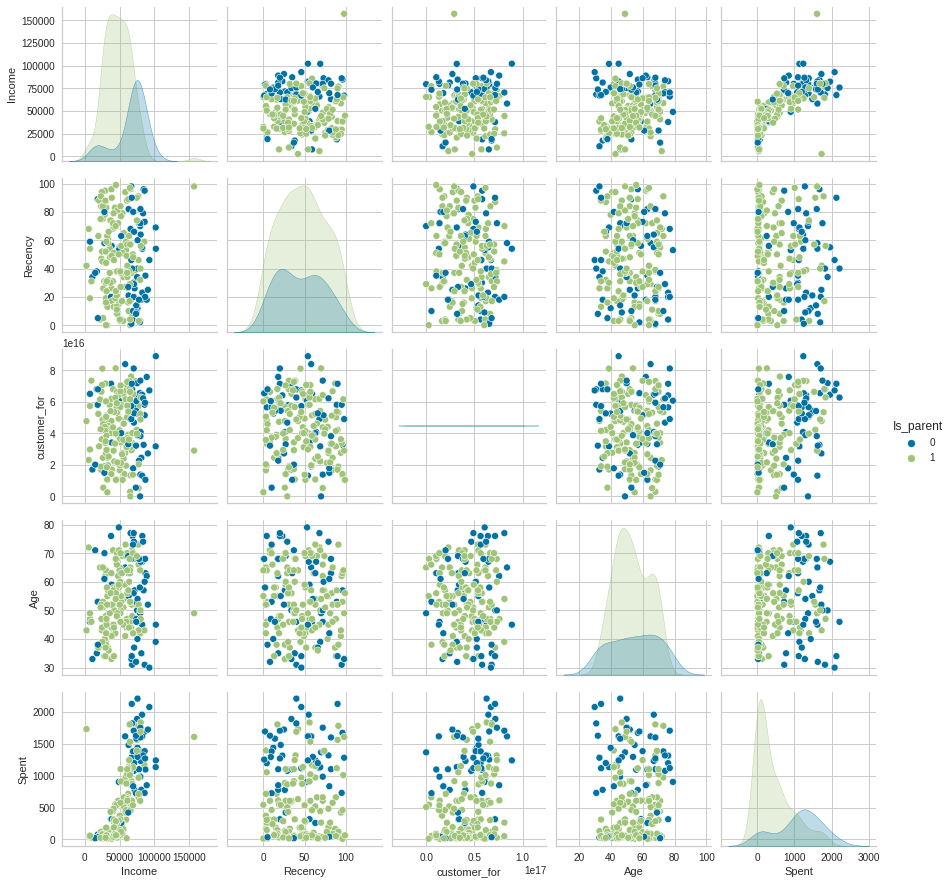

In [64]:
#plotting selected features
To_plot=["Income","Recency","customer_for","Age","Spent","Is_parent"]
print("Relative Plot of Selected Features: A data subset")
sns.pairplot(cust[To_plot],hue='Is_parent') #to see the plots based on parenthood status
plt.show()

In [65]:
#dropping outliers by setting a cap on age and income
cust=cust[(cust["Age"]<90)]
cust=cust[(cust["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(cust))

The total number of data-points after removing the outliers are: 200


In [66]:
#dropping redundant columns
cust=cust.drop(columns=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"])

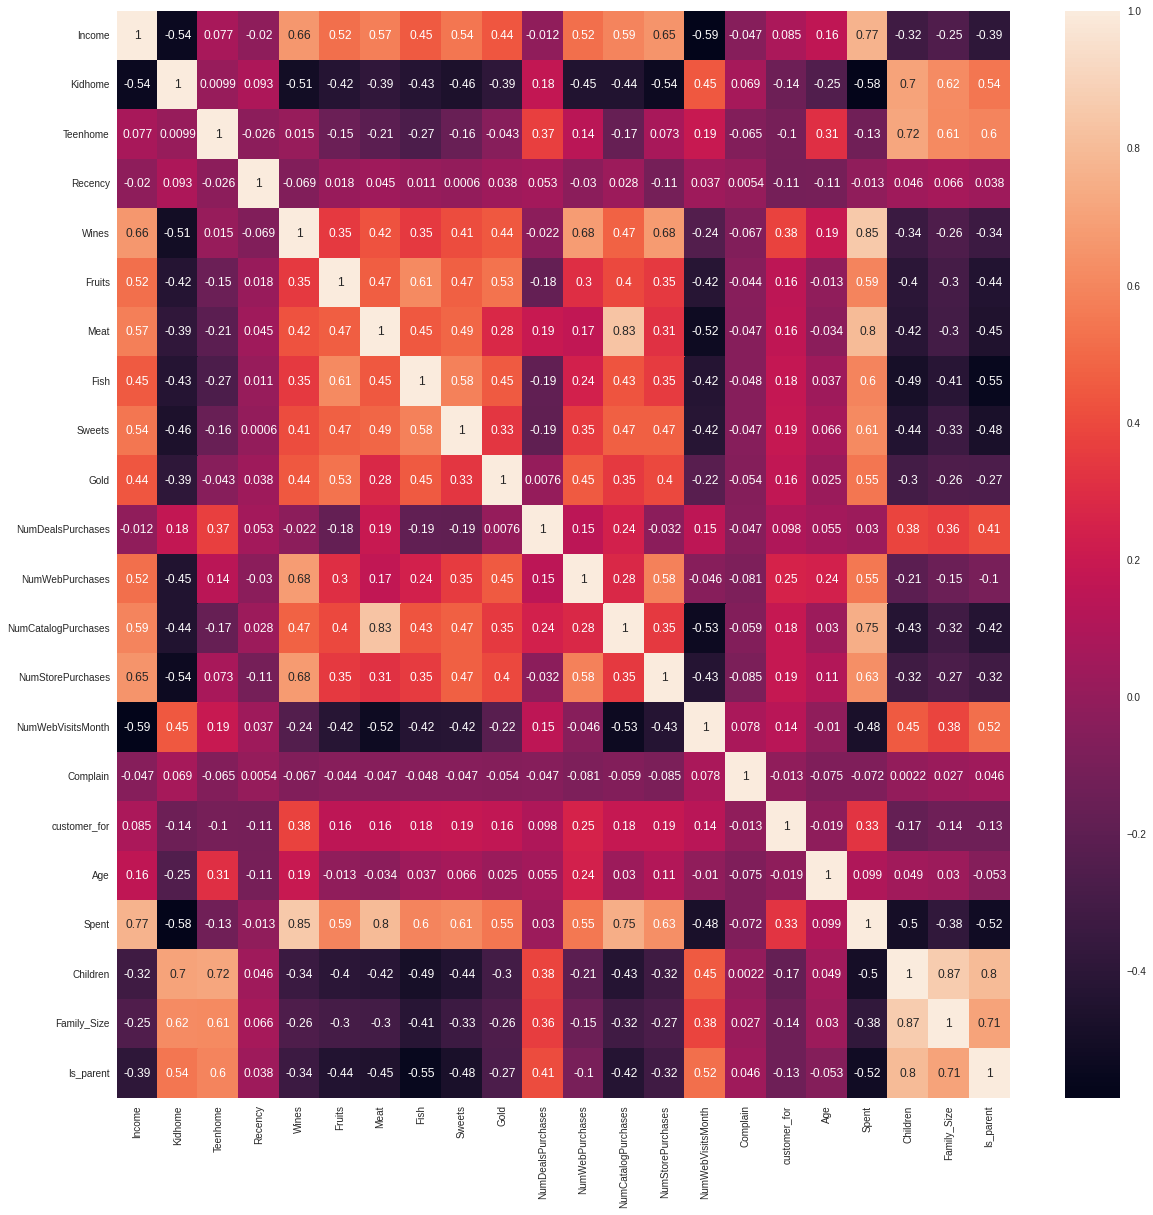

In [67]:
#correlation matrix/heatmap
corrmat=cust.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True)

**C. Model Fitting**

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
#from warnings import warningsfilter("ignore")
np.random.seed(42)

In [69]:
#Label Encoding the object dtypes
obj=(cust.dtypes=='object')
object_cols=list(obj[obj].index)
LE=LabelEncoder()
for i in object_cols:
  cust[i]=cust[[i]].apply(LE.fit_transform)
print("All variables are now categorical")


All variables are now categorical


In [70]:
#Creating a copy of the data
cust_copy=cust.copy()

In [116]:
#scaling  data
cust_scaled=cust.apply(lambda x: (x-np.mean(x))/np.std(x))

In [80]:
#scaling makes variance 1 
cust_scaled.var()

Education              1.005025
Income                 1.005025
Kidhome                1.005025
Teenhome               1.005025
Recency                1.005025
Wines                  1.005025
Fruits                 1.005025
Meat                   1.005025
Fish                   1.005025
Sweets                 1.005025
Gold                   1.005025
NumDealsPurchases      1.005025
NumWebPurchases        1.005025
NumCatalogPurchases    1.005025
NumStorePurchases      1.005025
NumWebVisitsMonth      1.005025
Complain               1.005025
customer_for           1.005025
Age                    1.005025
Spent                  1.005025
Living_With            1.005025
Children               1.005025
Family_Size            1.005025
Is_parent              1.005025
dtype: float64

In [117]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(cust_scaled)
PCA_ds = pd.DataFrame(pca.transform(cust_scaled), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  200.0  1.598721e-16  2.878159 -5.177577 -2.462737 -0.943900  2.801654   
col2  200.0  5.329071e-17  1.790094 -3.721447 -1.424135 -0.332208  1.313148   
col3  200.0 -1.332268e-17  1.329238 -3.133718 -0.722507 -0.021278  0.711147   

           max  
col1  6.467476  
col2  4.714573  
col3  7.433957

In [118]:
#Importing clustering algorithm library
from scipy.cluster.hierarchy import  dendrogram, linkage
#Plotting a dendrogram (complete linkage)
Z=linkage(PCA_ds ,'complete')

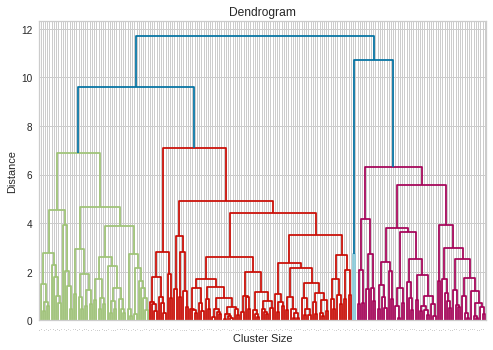

In [119]:
dendrogram(Z,leaf_rotation=90,leaf_font_size=1.)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.show()

<function matplotlib.pyplot.show>

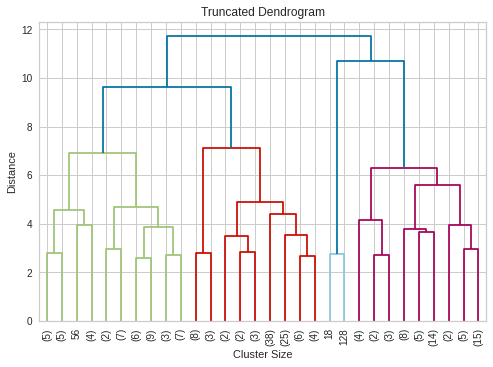

In [120]:
#truncated dendrogram
dendrogram(Z,truncate_mode='lastp',p=30,leaf_rotation=90,leaf_font_size=10.)
plt.title("Truncated Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.show

In [121]:
#Agglomerative Clustering
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [125]:
#setting  up the model
hclust=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")

In [126]:
#fitting on scaled date
hclust.fit(cust_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [127]:
#grouping the data
hclust.labels_

array([0, 1, 0, 1, 1, 4, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 4, 4, 4,
       1, 1, 1, 0, 1, 1, 1, 4, 0, 1, 4, 0, 0, 1, 1, 1, 0, 4, 4, 0, 1, 0,
       4, 0, 0, 1, 4, 0, 4, 0, 4, 0, 1, 1, 4, 0, 0, 4, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 4, 0, 1, 1, 1, 1, 4, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 4,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 4, 0, 4, 0, 1, 0, 1, 1, 1, 1, 0, 4,
       0, 4, 1, 4, 1, 3, 4, 4, 4, 0, 4, 1, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 4, 4, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 4, 4, 0, 1, 4, 0,
       4, 1, 0, 1, 4, 4, 0, 1, 4, 1, 4, 4, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

In [128]:
#adding new column
cust['Groups']=hclust.labels_

In [129]:
#understanding statistics of each cluster
cust.Groups.value_counts()

1    89
0    70
4    38
2     2
3     1
Name: Groups, dtype: int64

In [130]:
#understanding statistics of each cluster
cust.groupby(["Groups"]).mean()

Education        Income   Kidhome  Teenhome    Recency       Wines  \
Groups                                                                       
0        0.571429  73362.542857  0.028571  0.271429  44.885714  599.857143   
1        0.752809  34609.179775  0.865169  0.449438  49.348315   50.685393   
2        1.000000  79845.000000  0.500000  0.500000  70.000000   10.500000   
3        0.000000  38547.000000  1.000000  0.000000  49.000000    6.000000   
4        1.026316  59664.394737  0.289474  1.131579  43.394737  465.078947   

           Fruits         Meat       Fish     Sweets  ...  NumStorePurchases  \
Groups                                                ...                      
0       62.142857   384.828571  92.400000  62.600000  ...           8.428571   
1        4.157303    23.393258   7.764045   4.101124  ...           3.292135   
2        1.500000  1653.500000   1.000000   1.500000  ...           0.000000   
3        1.000000    10.000000   0.000000   1.000000  ...           2.000000   
4       10.973684   114.684211  14.552632  14.315789  ...           7.921053   

        NumWebVisitsMonth  Complain  customer_for        Age        Spent  \
Groups                                                                      
0                3.671429       0.0  5.130802e+16  55.600000  1276.371429   
1                6.393258       0.0  3.868973e+16  50.382022   104.235955   
2                0.500000       0.0  3.836160e+16  46.000000  1669.000000   
3                8.000000       1.0  4.008960e+16  41.000000    22.000000   
4                5.815789       0.0  4.201996e+16  58.921053   664.526316   

        Living_With  Children  Family_Size  Is_parent  
Groups                                                 
0          0.657143  0.300000     1.957143   0.285714  
1          0.651685  1.314607     2.966292   0.887640  
2          1.000000  1.000000     3.000000   1.000000  
3          1.000000  1.000000     3.000000   1.000000  
4          0.631579  1.421053     3.052632   1.000000  

[5 rows x 24 columns]

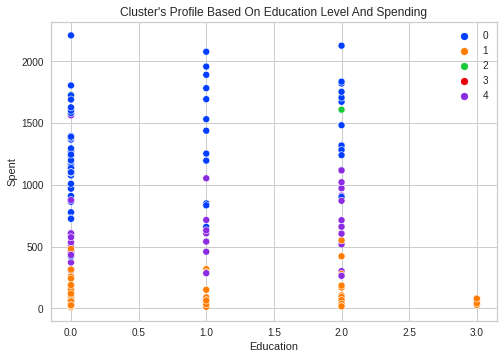

In [149]:
#plotting clusters
pl = sns.scatterplot(data = cust,x=cust["Education"], y=cust["Spent"],hue=cust["Groups"],palette="bright")
pl.set_title("Cluster's Profile Based On Education Level And Spending")
plt.legend()
plt.show()


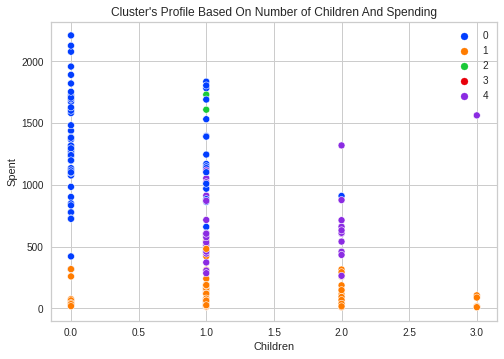

In [148]:
#plotting clusters
pl = sns.scatterplot(data = cust,x=cust["Children"], y=cust["Spent"],hue=cust["Groups"],palette="bright")
pl.set_title("Cluster's Profile Based On Number of Children And Spending")
plt.legend()
plt.show()


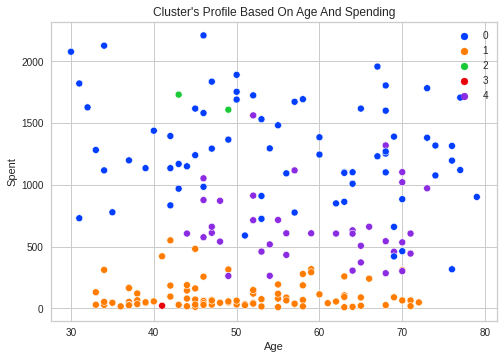

In [147]:
#plotting clusters
pl = sns.scatterplot(data = cust,x=cust["Age"], y=cust["Spent"],hue=cust["Groups"],palette="bright")
pl.set_title("Cluster's Profile Based On Age And Spending")
plt.legend()
plt.show()


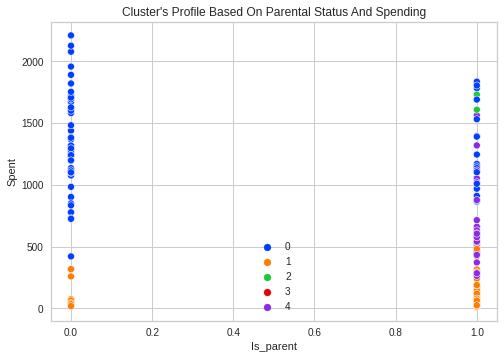

In [146]:
#plotting clusters
pl = sns.scatterplot(data = cust,x=cust["Is_parent"], y=cust["Spent"],hue=cust["Groups"],palette="bright")
pl.set_title("Cluster's Profile Based On Parental Status And Spending")
plt.legend()
plt.show()
